# データの読み取り

In [4]:
# データを総合して解析を行う
import os
import scipy.optimize
import itertools
import pandas as pd
import numpy as np
import glob #フォルダ内の特定の拡張子のファイルを一括で読み込む
%matplotlib inline
import matplotlib.pyplot as plt
os.chdir("C:\\Users\\cocoa\\Documents\\実験\\BL-12C\\XANES_XAN_files")
print(os.getcwd())

C:\Users\cocoa\Documents\実験\BL-12C\XANES_XAN_files


In [5]:
"""フォルダ内のXANファイルをすべて読み込む"""
spectrum=[[],[],[]]
n,m = 1, 1

for filename in glob.glob("*.xan*"):
    p = pd.read_csv(filename)
    
    for i in range(len(p)):
        if p["[XAN_DATA]"][i]=="[BG_BEGIN]":
            n = i
        elif p["[XAN_DATA]"][i]=="[BG_END]":
            m = i
        else: continue
    
    data = pd.read_csv(filename,encoding="SHIFT_JIS",sep=('\t'),usecols=[1,2,3,4],names=[1,2,3,4],
                       skiprows=n+3)[1:m-n]
    spectrum[0].append(data[1])
    spectrum[1].append(data[2])
    spectrum[2].append(filename)


In [6]:
print("sample list")
for i in range(len(spectrum[2])):
    print(str(i)+"  "+spectrum[2][i])

sample list
0  ammonium_oxalate_Fe_dat.xan
1  biotite_dat.xan
2  copepoda_Oarai_frozen.xan
3  Fe3O4_dat.xan
4  FeC2O4_2H2O_dat.xan
5  ferrihydrite_dat.xan
6  ferritin_EX_long_dat.xan
7  FeS_dat.xan
8  goethite_dat.xan
9  hematite_dat.xan
10  hemoglobin_dat.xan
11  J_flying_squid-A_frozen_liver.xan
12  J_sardine-B_frozen_muscle.xan
13  J_sardine-C_frozen_muscle.xan
14  krill_sanriku_frozen.xan
15  mache_dry_liver.xan
16  mache_frozen_heart.xan
17  mache_frozen_liver.xan
18  mache_frozen_muscle.xan
19  marcasite_dat.xan
20  MKR_02_liver_sdd.xan
21  MKR_02_ovary.xan
22  MKR_02_Red_muscle-3.xan
23  MKR_02_Red_muscle_0_s.xan
24  MKR_02_red_muscle_sdd.xan
25  MKR_02_White_muscle_3.xan
26  MKR_02_white_muscle_step.xan
27  MKR_04_liver_sdd.xan
28  MKR_04_ovary.xan
29  MKR_04_Red_Muscle.xan
30  MKR_04_red_muscle_sdd.xan
31  MKR_04_White_muscle.xan
32  MKR_06_blood_sdd.xan
33  MKR_06_heart.xan
34  MKR_06_liver_sdd.xan
35  MKR_06_red_muscle_sdd.xan
36  MKR_06_Teste.xan
37  MKR_06_white_muscle_sdd

target: MKR_07_blood_sdd.xan
standards: ['ferritin_EX_long_dat.xan', 'MKR_07_red_muscle_sdd.xan']
factors: [0.03719792 1.        ]


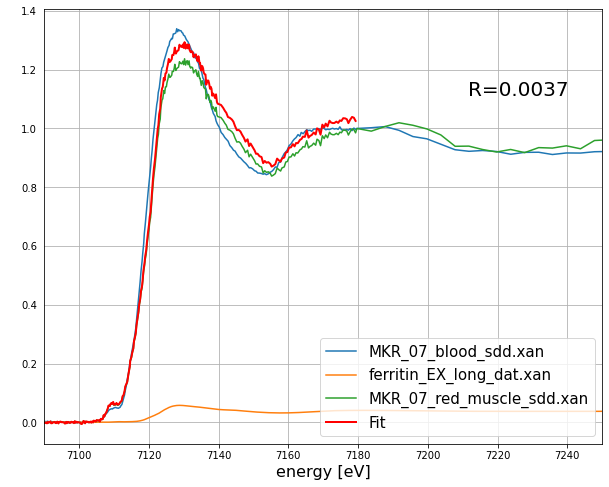

In [8]:
'任意成分・手動(改良)'
sample = [38,6, 40]
length=len(sample)
#フィッティング初期値（均等に割り振る）
x0=[(1/(length-1))]*(length-1)
bounds=[(0,1)]*(length-1) #factorは0から＋１の間

x=310#何番目の点までFittingにかけるか
target = spectrum[1][sample[0]][0:x]
energy1 = spectrum[0][sample[0]][0:x]
std =[]
stdname=[]
for i in range(length-1):
    std.append(spectrum[1][sample[i+1]][0:x])
    stdname.append(spectrum[2][sample[i+1]])
    
def Calc(x):
    global y
    y=[]
    for i in range(len(std)):
        y.append(std[i]*x[i])
    total = sum(y)
    return(total)

def Rval(x):
    R = sum((Calc(x) -  target)**2)/sum(target**2)#この計算式２条がsumのカッコ内に入る
    return(R)

Fit = scipy.optimize.minimize(Rval,x0=x0,bounds=bounds)
factor = np.hstack([1, Fit.x])

%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.set_xlabel("energy [eV]",fontsize=16)
ax.set_ylabel(" ")
ax.set_xlim(7090, 7250)
ax.grid()
ax.tick_params(left=False)

for m in range(len(sample)):
    energy =  [float(i) for i in spectrum[0][sample[m]][0:x]]
    energy_plot =  [float(i) for i in spectrum[0][sample[m]]]
    value = spectrum[1][sample[m]][0:x]*factor[m]
    value_plot = spectrum[1][sample[m]]*factor[m]
    ax.plot(energy_plot,value_plot, label=spectrum[2][sample[m]])
ax.plot(energy,Calc(Fit.x),color="red",linewidth = 2, label="Fit")
ax.text(0.76,0.8,"R="+str(round(Rval(Fit.x),5)),size=20,transform=ax.transAxes)
ax.legend(loc="lower right", fontsize=15)

print("target:", spectrum[2][sample[0]])
print("standards:",stdname)
print("factors:",Fit.x)

# 組み合わせ探索

In [75]:
print("sample list")
for i in range(len(spectrum[2])):
    print(str(i)+"  "+spectrum[2][i])

sample list
0  ammonium_oxalate_Fe_dat.xan
1  biotite_dat.xan
2  copepoda_Oarai_frozen.xan
3  Fe3O4_dat.xan
4  FeC2O4_2H2O_dat.xan
5  ferrihydrite_dat.xan
6  ferritin_EX_long_dat.xan
7  FeS_dat.xan
8  goethite_dat.xan
9  hematite_dat.xan
10  hemoglobin_dat.xan
11  J_flying_squid-A_frozen_liver.xan
12  J_sardine-B_frozen_muscle.xan
13  J_sardine-C_frozen_muscle.xan
14  krill_sanriku_frozen.xan
15  mache_dry_liver.xan
16  mache_frozen_heart.xan
17  mache_frozen_liver.xan
18  mache_frozen_muscle.xan
19  marcasite_dat.xan
20  MKR_02_liver_sdd.xan
21  MKR_02_ovary.xan
22  MKR_02_Red_muscle-3.xan
23  MKR_02_Red_muscle_0_s.xan
24  MKR_02_red_muscle_sdd.xan
25  MKR_02_White_muscle_3.xan
26  MKR_02_white_muscle_step.xan
27  MKR_04_liver_sdd.xan
28  MKR_04_ovary.xan
29  MKR_04_Red_Muscle.xan
30  MKR_04_red_muscle_sdd.xan
31  MKR_04_White_muscle.xan
32  MKR_06_blood_sdd.xan
33  MKR_06_heart.xan
34  MKR_06_liver_sdd.xan
35  MKR_06_red_muscle_sdd.xan
36  MKR_06_Teste.xan
37  MKR_06_white_muscle_sdd

target: MKR_08_liver.xan
standards: ['biotite_dat.xan', 'FeS_dat.xan', 'hemoglobin_dat.xan']
factors: [0.24463504 0.05269975 0.6704008 ]


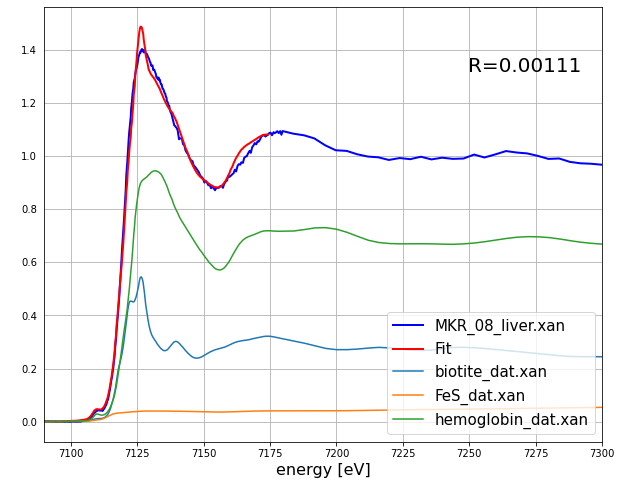

In [9]:
'''任意成分・組み合わせ探索'''
t = 3 #成分数の上限
standards =  [0,1,2,3,5,6,7,8,9,10]#この中から最適な組み合わせを選ぶ
target_num = 44#Fittingをかけるターゲット

%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.set_xlabel("energy [eV]",fontsize=16)
ax.set_ylabel(" ")
ax.set_xlim(7090, 7300)
ax.grid()
ax.tick_params(left=False)

n=300 #何番目の点までFittingにかけるか
target = spectrum[1][target_num][0:n]

result = []
Rval_before = 1

def Calc(std,x):
    global y
    y=[]
    for i in range(len(std)):
        y.append(std[i]*x[i])
    total = sum(y)
    return(total)


for v in itertools.combinations(standards, t):
    std_group = [[1]]*t
    for i in range(t):
        std_group[i] = spectrum[1][v[i]][0:n]

    #フィッティング初期値（均等に割り振る）
    x0=[(1/t)]*t
    bounds=[(0,1)]*t #factorは0から＋１の間

    def Rval(x):
        R = sum((Calc(std_group,x) -  target)**2)/sum(target**2)#この計算式２条がsumのカッコ内に入る
        return(R)

    Fit = scipy.optimize.minimize(Rval,x0=x0,bounds=bounds)

    if (Rval(Fit.x) <= Rval_before):
        result=Fit.x
        Rval_before = Rval(Fit.x)
        log=(v)
        logstd=std_group
    else: continue

def Rval2 (x):
    R = sum((Calc(logstd,x) -  target)**2)/sum(target**2)#この計算式２条がsumのカッコ内に入る
    return(R)

energy =  [float(i) for i in spectrum[0][target_num]]
energy_n =  [float(i) for i in spectrum[0][target_num][0:n]]

ax.plot(energy,spectrum[1][target_num],color="blue",linewidth = 2, label=spectrum[2][target_num])
ax.plot(energy_n,Calc(logstd, result),color="red",linewidth = 2, label="Fit")

stdname=[]
for m in range(len(log)):
    stdname.append(spectrum[2][log[m]])
    energy =  [float(i) for i in spectrum[0][log[m]]]
    value = spectrum[1][log[m]]*result[m]
    ax.plot(energy,value, label=spectrum[2][log[m]])
    
ax.legend(loc="lower right", fontsize=15)
ax.text(0.76,0.85,"R="+str(round(Rval2(result),5)),size=20,transform=ax.transAxes)

print("target:", spectrum[2][target_num])
print("standards:",stdname)
print("factors:",result)